<a href="https://www.kaggle.com/datajmcn/irishweatherhourlydata-analysis?scriptVersionId=88788581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Irish Weather Data analysis

Exploratory Data Analysis (EDA) will be used to help provide initial discoveries about the key aspects of the dataset

Tasks
* Preview the data
* Variable types
* Summary stats
* Missing value and outliers
* Visualisations

## 1. Pre-processing

In [1]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import seaborn as sns

In [2]:
# Review the files in the folder
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # With only one file we can create the variable containing the file path
        input_data = str(os.path.join(dirname, filename))
        print(input_data)

/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv
/kaggle/input/irish-weather-hourly-data/hrly_Irish_weather.csv


In [3]:
df = pd.read_csv('../input/irish-weather-hourly-data/hrly_Irish_weather.csv', parse_dates=['date'])
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,Galway,ATHENRY,53.289,-8.786,2011-06-26 01:00:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
1,Galway,ATHENRY,53.289,-8.786,2011-06-26 02:00:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2,Galway,ATHENRY,53.289,-8.786,2011-06-26 03:00:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
3,Galway,ATHENRY,53.289,-8.786,2011-06-26 04:00:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
4,Galway,ATHENRY,53.289,-8.786,2011-06-26 05:00:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype         
---  ------     -----         
 0   county     object        
 1   station    object        
 2   latitude   float64       
 3   longitude  float64       
 4   date       datetime64[ns]
 5   rain       object        
 6   temp       object        
 7   wetb       object        
 8   dewpt      object        
 9   vappr      object        
 10  rhum       object        
 11  msl        object        
 12  wdsp       object        
 13  wddir      object        
 14  sun        object        
 15  vis        object        
 16  clht       object        
 17  clamt      object        
dtypes: datetime64[ns](1), float64(2), object(15)
memory usage: 640.0+ MB


In [5]:
# Review a random sample of records from the dataframe. The n value inside the parenthesis represents the number of records to review
df.sample(5)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
1861521,Tipperary,GURTEEN,53.053,-8.009,2009-09-11 00:00:00,0.0,7.9,7.8,7.7,10.5,98,1040.2,3,50,NaN,NaN,NaN,NaN
2996415,Roscommon,MT DILLON,53.727,-7.981,2012-02-03 11:00:00,0.0,1.6,0.6,-1.4,5.5,80,1036.3,3,160,NaN,NaN,NaN,NaN
1421251,Dublin,DUBLIN AIRPORT,53.428,-6.241,2006-04-17 04:00:00,0.0,6.1,5.7,5.2,8.8,94,1013.2,14,250,0.0,20000,60,7
4142985,Clare,SHANNON AIRPORT,52.690,-8.918,2007-11-22 03:00:00,0.0,4.9,4.3,3.4,7.8,90,1005.9,5,310,0.0,20000,999,1
2116465,Mayo,KNOCK AIRPORT,53.906,-8.817,1999-07-09 22:00:00,0.0,16.3,14.7,13.5,15.4,83,1026.3,7,40,0.0,20000,100,7


In [6]:
# Shape of the dataframe
print(df.shape)
# Find the number of rows within a dataframe
print(len(df))
# Extracting information from the shape tuple
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

(4660423, 18)
4660423
Number of rows: 4660423 
Number of columns: 18


### 1b. Variable types

Aiming to understand if any datatype conversion is required to ensure that variables are in the correct format for further data analysis

In [7]:
# Gain high level view of the datatypes for each variable
df.dtypes

county               object
station              object
latitude            float64
longitude           float64
date         datetime64[ns]
rain                 object
temp                 object
wetb                 object
dewpt                object
vappr                object
rhum                 object
msl                  object
wdsp                 object
wddir                object
sun                  object
vis                  object
clht                 object
clamt                object
dtype: object

In [8]:
# Information about the dataframe. The memory_usage parameter provides a more in-depth review of the size of the dataframe
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype         
---  ------     -----         
 0   county     object        
 1   station    object        
 2   latitude   float64       
 3   longitude  float64       
 4   date       datetime64[ns]
 5   rain       object        
 6   temp       object        
 7   wetb       object        
 8   dewpt      object        
 9   vappr      object        
 10  rhum       object        
 11  msl        object        
 12  wdsp       object        
 13  wddir      object        
 14  sun        object        
 15  vis        object        
 16  clht       object        
 17  clamt      object        
dtypes: datetime64[ns](1), float64(2), object(15)
memory usage: 3.1 GB


In [9]:
# Review memory usage by variable
df.memory_usage(deep='True')

Index              128
county       291406432
station      316033765
latitude      37283384
longitude     37283384
date          37283384
rain         224352059
temp         203269019
wetb         217049276
dewpt        212216012
vappr        216932437
rhum         221919996
msl          223585543
wdsp         216541269
wddir        224264835
sun          156714320
vis          170352415
clht         163246557
clamt        163205004
dtype: int64

As object variables consume the most memory, converting to an appropriate data type can really help with processing as the overall memory footprint is reduced. By default pandas will set variables with mixed datatypes to an object value. In this case mixed data types can contain string, date, integer or float values. If we understand what elements make up the variable, then data type conversions to the appropriate numeric or categorical type can take place. 

##### Categorical

From the dataframe summary we can see that the first two variables are categorical. Therefore understanding the cardinality (number of unique segments) of the variable can help to understand if a data type conversion makes sense.

In [10]:
# Review the first few categorical variables
cat_list = ['county', 'station']
df.groupby('county')['county'].count()

county
Carlow       147576
Cavan        133704
Clare        266617
Cork         802513
Donegal      460028
Dublin       653378
Galway       216792
Kerry        266616
Mayo         877279
Meath        108887
Roscommon    108192
Sligo        108888
Tipperary    108144
Westmeath    266617
Wexford      135192
Name: county, dtype: int64

In [11]:
# Count for the station
df.groupby('station')['station'].count()

station
ATHENRY                  78312
BALLYHAISE              133704
BELMULLET               266617
CASEMENT                266617
CLAREMORRIS             266580
CORK AIRPORT            266617
DUBLIN AIRPORT          266617
DUNSANY                 108887
FINNER                  193411
GURTEEN                 108144
JOHNSTOWNII             135192
KNOCK AIRPORT           208938
MACE HEAD               138480
MALIN HEAD              266617
MARKREE                 108888
MOORE PARK              147576
MT DILLON               108192
MULLINGAR               266617
NEWPORT                 135144
OAK PARK                147576
PHOENIX PARK            120144
ROCHES POINT            247296
SHANNON AIRPORT         266617
SherkinIsland           141024
VALENTIA OBSERVATORY    266616
Name: station, dtype: int64

In [12]:
# Convert both of these variables into category data types
# Create a conversion dictionary to allow for easier maintenance
cat_type = {'county':'category',
            'station':'category'
           }
df = df.astype(cat_type)
# Review the new memory consumption
df[cat_list].memory_usage(deep='True')

Index          128
county     4661926
station    4662660
dtype: int64

In [13]:
# Confirm that the data types have changed
df[cat_list].dtypes

county     category
station    category
dtype: object

The most efficient method to convert data types is to apply the changes within the data import step. For csv files that are being used as dataframes, the dtype= parameter of pd.read_csv() can be updated.

##### Numeric

There will be a number of choices for numeric variables. Applying floats for values with decimal places. Integers for whole numbers. Finally, converting a date variable from string to datetime.

In [14]:
df.sample(5)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
3171075,Westmeath,MULLINGAR,53.537,-7.362,2001-08-07 22:00:00,0.0,12.2,11.8,11.5,13.5,95,1001.1,4,280,NaN,NaN,NaN,NaN
1856550,Tipperary,GURTEEN,53.053,-8.009,2009-02-15 21:00:00,0.0,7.8,6.5,4.9,8.7,82,1028.1,6,220,NaN,NaN,NaN,NaN
2832479,Cork,MOORE PARK,52.164,-8.264,2005-09-24 19:00:00,4.8,13.7,13.3,12.9,14.9,94,1002.7,8,160,NaN,NaN,NaN,NaN
3450966,Mayo,NEWPORT,53.922,-9.572,2018-02-11 01:00:00,0.0,3.9,2.3,-0.5,5.9,73,1001.3,18,280,NaN,NaN,NaN,NaN
2918622,Cork,MOORE PARK,52.164,-8.264,2015-07-24 02:00:00,0.0,11.6,9.9,8.1,10.8,78,1013.0,4,320,NaN,NaN,NaN,NaN


In [15]:
# Convert all values except the categorical variables into float values
# Create two lists (1. Float, 2. Integers)
# Errors emerged when applying blindly to all remaining variables. More investigations required
float_vars = [i for i in df.columns[~df.columns.isin(['county','station','date','sun','vis','clht','clamt'])]]

float_cols = ['latitude','longitude']

# df[float_vars] = df[float_vars].apply(pd.to_numeric, downcast='float')
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

In [16]:
# convert the date to date format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

In [17]:
df[float_cols].dtypes

latitude     float32
longitude    float32
dtype: object

In [18]:
df[float_cols].memory_usage(deep='True')

Index             128
latitude     18641692
longitude    18641692
dtype: int64

In [19]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype         
---  ------     -----         
 0   county     category      
 1   station    category      
 2   latitude   float32       
 3   longitude  float32       
 4   date       datetime64[ns]
 5   rain       object        
 6   temp       object        
 7   wetb       object        
 8   dewpt      object        
 9   vappr      object        
 10  rhum       object        
 11  msl        object        
 12  wdsp       object        
 13  wddir      object        
 14  sun        object        
 15  vis        object        
 16  clht       object        
 17  clamt      object        
dtypes: category(2), datetime64[ns](1), float32(2), object(13)
memory usage: 2.5 GB


### 1c. Summary stats

In [20]:
# Review the high level summary details for each variable
df.describe(include="all", datetime_is_numeric=True)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
count,4660423,4660423,4.660423e+06,4.660423e+06,4660423,4660423,4660423,4660423,4660423,4660423,4660423,4660423,4431391,4431391,2075256.0,2075256,2075256.0,2075256.0
unique,15,25,NaN,NaN,NaN,361,932,748,760,483,170,2052,124,75,25.0,174,299.0,20.0
top,Mayo,BELMULLET,NaN,NaN,NaN,0.0,,,,,,,6,220,0.0,,999.0,7.0
freq,877279,266617,NaN,NaN,NaN,2090656,32581,45288,44159,187484,163615,73283,172056,112008,1335700.0,270249,401839.0,567822.0
mean,NaN,NaN,5.325445e+01,-8.181245e+00,2008-04-28 22:03:54.069912320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,5.147600e+01,-1.024100e+01,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.229800e+01,-8.993000e+00,2002-06-22 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.342800e+01,-8.244000e+00,2009-09-15 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.390600e+01,-7.310000e+00,2015-02-06 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,5.537200e+01,-6.241000e+00,2020-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1d. Missing values and outliers

In [21]:
# Check for the missing values by columns
df.isnull().sum()

# Proportion of missing values by column
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

# Apply the missing value method
null_dict = isnull_prop(df)
print(null_dict.items())

dict_items([('county', [0, 0.0]), ('station', [0, 0.0]), ('latitude', [0, 0.0]), ('longitude', [0, 0.0]), ('date', [0, 0.0]), ('rain', [0, 0.0]), ('temp', [0, 0.0]), ('wetb', [0, 0.0]), ('dewpt', [0, 0.0]), ('vappr', [0, 0.0]), ('rhum', [0, 0.0]), ('msl', [0, 0.0]), ('wdsp', [229032, 0.049144036925403554]), ('wddir', [229032, 0.049144036925403554]), ('sun', [2585167, 0.5547065148378162]), ('vis', [2585167, 0.5547065148378162]), ('clht', [2585167, 0.5547065148378162]), ('clamt', [2585167, 0.5547065148378162])])


<AxesSubplot:>

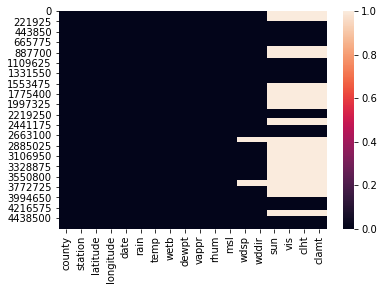

In [22]:
# Display missing values using a heatmap to understand if any patterns are present
sns.heatmap(df.isnull())

Appears to be certain stations are not collecting data for the final four variables.

In [23]:
df_miss = df.loc[(df['sun'].isnull()), ['county','station','date','sun']]
df_miss.shape

(2585167, 4)

In [24]:
# Missing values by station
df_miss.groupby(['station'])['date'].count()

station
ATHENRY                  78312
BALLYHAISE              133704
BELMULLET                    0
CASEMENT                     0
CLAREMORRIS             266580
CORK AIRPORT                 0
DUBLIN AIRPORT               0
DUNSANY                 108887
FINNER                  193411
GURTEEN                 108144
JOHNSTOWNII             135192
KNOCK AIRPORT                0
MACE HEAD               138480
MALIN HEAD                   0
MARKREE                 108888
MOORE PARK              147576
MT DILLON               108192
MULLINGAR               266617
NEWPORT                 135144
OAK PARK                147576
PHOENIX PARK            120144
ROCHES POINT            247296
SHANNON AIRPORT              0
SherkinIsland           141024
VALENTIA OBSERVATORY         0
Name: date, dtype: int64

In [25]:
# Set the index to date and check for missing values across time
df.index = df['date']
df.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,
2011-06-26 01:00:00,Galway,ATHENRY,53.289001,-8.786,2011-06-26 01:00:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
2011-06-26 02:00:00,Galway,ATHENRY,53.289001,-8.786,2011-06-26 02:00:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2011-06-26 03:00:00,Galway,ATHENRY,53.289001,-8.786,2011-06-26 03:00:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
2011-06-26 04:00:00,Galway,ATHENRY,53.289001,-8.786,2011-06-26 04:00:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
2011-06-26 05:00:00,Galway,ATHENRY,53.289001,-8.786,2011-06-26 05:00:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN


In [26]:
# Mapping of stations by county
df_g = df.groupby(['county','station']).size().unstack(level=0)
df_g

county,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Mayo,Meath,Roscommon,Sligo,Tipperary,Westmeath,Wexford
station,,,,,,,,,,,,,,,
ATHENRY,0,0,0,0,0,0,78312,0,0,0,0,0,0,0,0
BALLYHAISE,0,133704,0,0,0,0,0,0,0,0,0,0,0,0,0
BELMULLET,0,0,0,0,0,0,0,0,266617,0,0,0,0,0,0
CASEMENT,0,0,0,0,0,266617,0,0,0,0,0,0,0,0,0
CLAREMORRIS,0,0,0,0,0,0,0,0,266580,0,0,0,0,0,0
CORK AIRPORT,0,0,0,266617,0,0,0,0,0,0,0,0,0,0,0
DUBLIN AIRPORT,0,0,0,0,0,266617,0,0,0,0,0,0,0,0,0
DUNSANY,0,0,0,0,0,0,0,0,0,108887,0,0,0,0,0
FINNER,0,0,0,0,193411,0,0,0,0,0,0,0,0,0,0


### 2. Visualisations

In [27]:
# Unique list of values
df_unq_loc = df.drop_duplicates(subset=['station','county'])
df_unq_loc

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,
2011-06-26 01:00:00,Galway,ATHENRY,53.289001,-8.786,2011-06-26 01:00:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
2004-01-01 01:00:00,Cavan,BALLYHAISE,54.050999,-7.310,2004-01-01 01:00:00,,,,,,,,,,NaN,NaN,NaN,NaN
1990-01-01 00:00:00,Mayo,BELMULLET,54.228001,-10.007,1990-01-01 00:00:00,0.0,7.6,7.1,6.5,9.7,93,1003.0,10,200,0.0,26000.0,16.0,8.0
1990-01-01 00:00:00,Dublin,CASEMENT,53.306000,-6.439,1990-01-01 00:00:00,0.0,9.2,8.5,7.8,10.5,91,1007.9,13,160,0.0,15000,14,7
1990-01-01 00:00:00,Mayo,CLAREMORRIS,53.710999,-8.993,1990-01-01 00:00:00,0.1,7.1,7.0,6.9,9.9,99,1004.5,7,160,NaN,NaN,NaN,NaN
1990-01-01 00:00:00,Cork,CORK AIRPORT,51.847000,-8.486,1990-01-01 00:00:00,1.4,7.8,7.7,7.6,10.4,99,1006.7,9,200,0.0,30000.0,40.0,7.0
1990-01-01 00:00:00,Dublin,DUBLIN AIRPORT,53.428001,-6.241,1990-01-01 00:00:00,0.1,9.0,8.1,7.1,10.1,88,1008.3,10,140,0.0,7000,7,8
2006-12-31 01:00:00,Meath,DUNSANY,53.515999,-6.660,2006-12-31 01:00:00,0.0,4.8,4.1,3.2,7.7,89,1009.0,11,210,NaN,NaN,NaN,NaN
1997-05-29 17:00:00,Donegal,FINNER,54.493999,-8.243,1997-05-29 17:00:00,,21.1,15.6,11.2,,,,,,NaN,NaN,NaN,NaN


In [28]:
# Clustering on the listings
import folium
from folium.plugins import FastMarkerCluster

Lat = 53.390862
Long = -6.158100

locations = list(zip(df_unq_loc.latitude, df_unq_loc.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=7)
# FastMarkerCluster(data=locations).add_to(map1)
# map1

# add marker one by one on the map
for i in range(0,len(df_unq_loc)):
    folium.Marker(
        location=[df_unq_loc.iloc[i]['latitude'], df_unq_loc.iloc[i]['longitude']],
        popup=df_unq_loc.iloc[i]['station']+',\n'+df_unq_loc.iloc[i]['county'],
    ).add_to(map1)
map1

In [29]:
# Add the temperatures to the graph to understand differences
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df_s = df.groupby(['station'])['temp'].agg(['min','mean','max'])
df_s

,min,mean,max
station,,,
ATHENRY,-6.2,9.851685,29.9
BALLYHAISE,-15.1,9.317660,28.7
BELMULLET,-7.3,10.455915,28.2
CASEMENT,-15.4,9.816053,30.3
CLAREMORRIS,-15.0,9.466642,30.0
CORK AIRPORT,-7.0,9.878486,27.4
DUBLIN AIRPORT,-11.5,9.750998,28.5
DUNSANY,-13.3,9.415707,27.8
FINNER,-8.4,10.170917,29.3


In [30]:
# Merge the unique locations and temperatures
df_s = df_s.reset_index()
df_unq_temp = pd.merge(df_unq_loc.loc[:,['station','county','latitude','longitude']],
                       df_s,
                       how='left',
                       on=['station']
                      )
df_unq_temp

,station,county,latitude,longitude,min,mean,max
0,ATHENRY,Galway,53.289001,-8.786,-6.2,9.851685,29.9
1,BALLYHAISE,Cavan,54.050999,-7.310,-15.1,9.317660,28.7
2,BELMULLET,Mayo,54.228001,-10.007,-7.3,10.455915,28.2
3,CASEMENT,Dublin,53.306000,-6.439,-15.4,9.816053,30.3
4,CLAREMORRIS,Mayo,53.710999,-8.993,-15.0,9.466642,30.0
5,CORK AIRPORT,Cork,51.847000,-8.486,-7.0,9.878486,27.4
6,DUBLIN AIRPORT,Dublin,53.428001,-6.241,-11.5,9.750998,28.5
7,DUNSANY,Meath,53.515999,-6.660,-13.3,9.415707,27.8
8,FINNER,Donegal,54.493999,-8.243,-8.4,10.170917,29.3
9,GURTEEN,Tipperary,53.053001,-8.009,-13.4,9.541428,29.7


In [31]:
# Add more details to the output
# Use the temperature to display difference in average temperatures
def colour_temp(temp):
    if temp < 9:
        return "purple"
    elif temp < 10:
        return "blue"
    elif temp < 11:
        return "green"
    else:
        return "red"

Lat = 53.390862
Long = -6.158100

locations = list(zip(df_unq_temp.latitude, df_unq_temp.longitude))

map2 = folium.Map(location=[Lat,Long], zoom_start=7)

# Add Details to the markers
for i in range(len(locations)):
    folium.Marker(locations[i]
                  ,popup=df_unq_temp.iloc[i]['station']+',\n'+df_unq_temp.iloc[i]['county']+' '+str(df_unq_temp.iloc[i]['mean'])
                  ,icon=folium.Icon(color=colour_temp(df_unq_temp.iloc[i]['mean']))
                 ).add_to(map2)
map2